In [172]:
import numpy as np
import math
import itertools
from matplotlib import pyplot as plt
%matplotlib inline

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [39]:
x = np.random.randint(0, high=37)
print("Шарик остановился на", x)

Шарик остановился на 26


2.1 Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

2.2 Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы х0+х1+ …+ х9.

In [123]:
# 2.1
# Вероятность выпадения четных близка к 1/2 и составляет 18/37


# 2.1.1 Сложение вероятности. Четное за две попытки выпадет с вероятностью 18/37 + 18/37 
p = 18/37 + 18/37
n = 100000
m = 0

for i in range(n):
    x1 = np.random.randint(0, high=37)
    x2 = np.random.randint(0, high=37)
    if (x1 != 0 and x1 % 2 == 0) or (x2 != 0 and x2 % 2 == 0):
        m += 1
    
print("Теоритическая вероятность выпадения четного за два вращения рулетки", p)
print(f"В {n} экспериментах получили {m} четных значений"   )
print("Проверка экспериментом показала вероятность", m/n)

# На практике всегда выпадает около 0,73 , а не 0,97. Вероятно это из-за псевдослучайности. Или ошибка в коде.

Теоритическая вероятность выпадения четного за два вращения рулетки 0.972972972972973
В 100000 экспериментах получили 73568 четных значений
Проверка экспериментом показала вероятность 0.73568


In [115]:
# 2.1.2  Умножение вероятности. Два четных подрят выпадет с вероятностью 18/37 * 18/37 
p = 18/37 * 18/37
n = 100000
m = 0

for i in range(n):
    x1 = np.random.randint(0, high=37)
    x2 = np.random.randint(0, high=37)
    if x1 != 0 and x2 != 0 and x1 % 2 == 0 and x2 % 2 == 0:
        m += 1
    
print("Теоритическая вероятность выпадения четного за два вращения рулетки", p)
print(f"В {n} экспериментах получили {m} четных значений"   )
print("На практике вероятность составила", m/n)


Теоритическая вероятность выпадения четного за два вращения рулетки 0.23666910153396642
В 100000 экспериментах получили 23384 четных значений
На практике вероятность составила 0.23384


[158, 136, 223, 129, 193, 259, 163, 168, 158, 207]


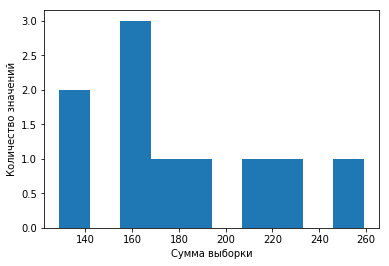

In [120]:
# 2.2
y = []
for i in  range(10):
    x = np.random.randint(0, high=37, size = 10)
    y_tmp = np.sum(x)
    y.append(y_tmp)
    
print(y)
plt.hist(y)
plt.xlabel("Сумма выборки")
plt.ylabel('Количество значений')
plt.show()

3.1 Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

3.2 Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.


In [169]:
# 3.1
k, n = 0, 1000

x1 = np.random.randint(0, high=2, size=n)
x2 = np.random.randint(0, high=2, size=n)
x3 = np.random.randint(0, high=2, size=n)
x4 = np.random.randint(0, high=2, size=n)

# Проверяем, чтобы за четыре испытания четное выпало два раза.

x = x1 + x2 + x3 + x4

for i in range(0,n):
    if x[i] == 2:
        k += 1
        
print ("k = ", k ,"; Испытаний: ", n, "; Доля:", k/n)

k1 = 2
n1 = 4
p = 0.5
q = 0.5
cnk = math.factorial(n1)/(math.factorial(k1)*math.factorial(n1-k1))
pnk = cnk * (p**k1)* (q**(n1-k1))
pnk1 = cnk / (2**n1)
print("Расчетная вероятность выпадения ", k1, "успехов из", n1 ,"испытаний - ", pnk )

k =  382 ; Испытаний:  1000 ; Доля: 0.382
Расчетная вероятность выпадения  2 успехов из 4 испытаний -  0.375


In [170]:
# 3.2
k, n = 0, 1000

x1 = np.random.randint(0, high=2, size=n)
x2 = np.random.randint(0, high=2, size=n)
x3 = np.random.randint(0, high=2, size=n)
x4 = np.random.randint(0, high=2, size=n)
x5 = np.random.randint(0, high=2, size=n)
x6 = np.random.randint(0, high=2, size=n)

# Проверяем, чтобы за шесть испытаний четное выпало три раза.

x = x1 + x2 + x3 + x4 + x5 + x6

for i in range(0,n):
    if x[i] == 2:
        k += 1
        
print ("k = ", k ,"; Испытаний: ", n, "; Доля:", k/n)

k1 = 3
n1 = 6
p = 0.5
q = 0.5
cnk = math.factorial(n1)/(math.factorial(k1)*math.factorial(n1-k1))
pnk = cnk * (p**k1)* (q**(n1-k1))
pnk1 = cnk / (2**n1)
print("Расчетная вероятность выпадения ", k1, "успехов из", n1 ,"испытаний - ", pnk )

# фактическое возле 0.22 , а расчетное - 0.3125 

k =  272 ; Испытаний:  1000 ; Доля: 0.272
Расчетная вероятность выпадения  3 успехов из 6 испытаний -  0.3125


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k


In [188]:
# 4.1 Размещение 2 из 5
n = 0
for p in itertools.permutations("c3v4d",2):
    print("".join(str(x) for x in p))
    n +=1
print("Количество вариантов: n = ",n)

c3
cv
c4
cd
3c
3v
34
3d
vc
v3
v4
vd
4c
43
4v
4d
dc
d3
dv
d4
Количество вариантов: n =  20


In [187]:
# 4.2 Сочетание 2 из 5
n = 0
for p in itertools.combinations("c3v4d",2):
    print("".join(str(x) for x in p))
    n +=1
print("Количество вариантов: n = ",n)

c3
cv
c4
cd
3v
34
3d
v4
vd
4d
Количество вариантов: n =  10


In [196]:
# 4.3 Перестановка 3 из 3
n = 0
for p in itertools.permutations("123",3):
    print("".join(str(x) for x in p))
    n +=1
print("Количество вариантов: n = ",n)

123
132
213
231
312
321
Количество вариантов: n =  6


5. Дополните код расчетом коэффициента корреляции x и y по формуле